In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
#uploaded=files.upload()
df=pd.read_csv('../data/India_GDP_Data.csv')
print(df.columns)





Index(['Year', 'GDP_In_Billion_USD', 'Per_Capita_in_USD',
       'Percentage_Growth '],
      dtype='object')


In [5]:
df=df[['Year', 'Percentage_Growth ']]
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Percentage_Growth ']=scaler.fit_transform(df['Percentage_Growth '].values.reshape(-1,1))



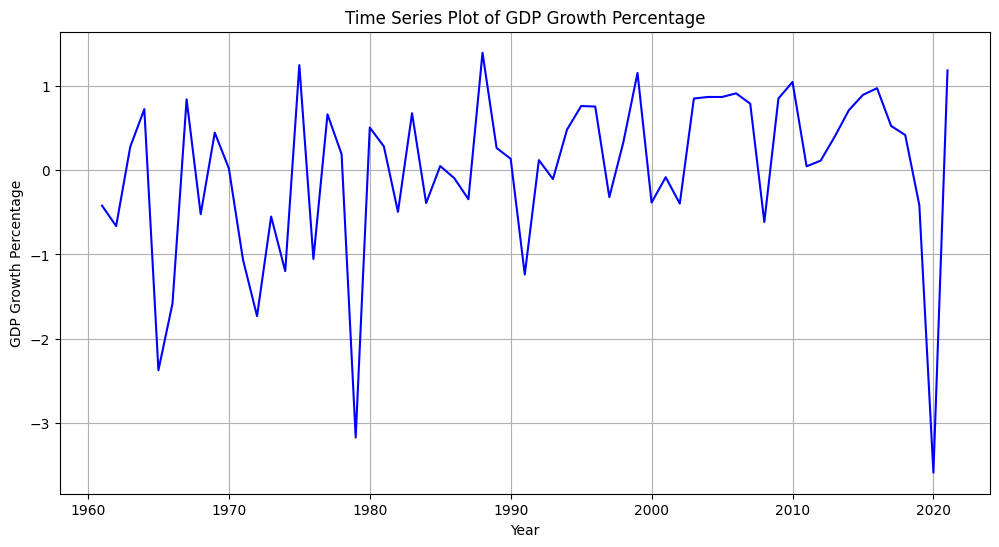

In [6]:
# Assuming df is your Pandas DataFrame with 'Year' and 'Percentage_Growth' columns
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Percentage_Growth '], label='GDP Growth Percentage', color='b')
plt.xlabel('Year')
plt.ylabel('GDP Growth Percentage')
plt.title('Time Series Plot of GDP Growth Percentage')
plt.grid(True)
plt.show()


In [7]:
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
model.fit(df[['Year', 'Percentage_Growth ']])



IsolationForest(contamination=0.05)

In [8]:
df['anomaly'] = model.predict(df[['Year', 'Percentage_Growth ']])
anomalies = df[df['anomaly'] == -1]


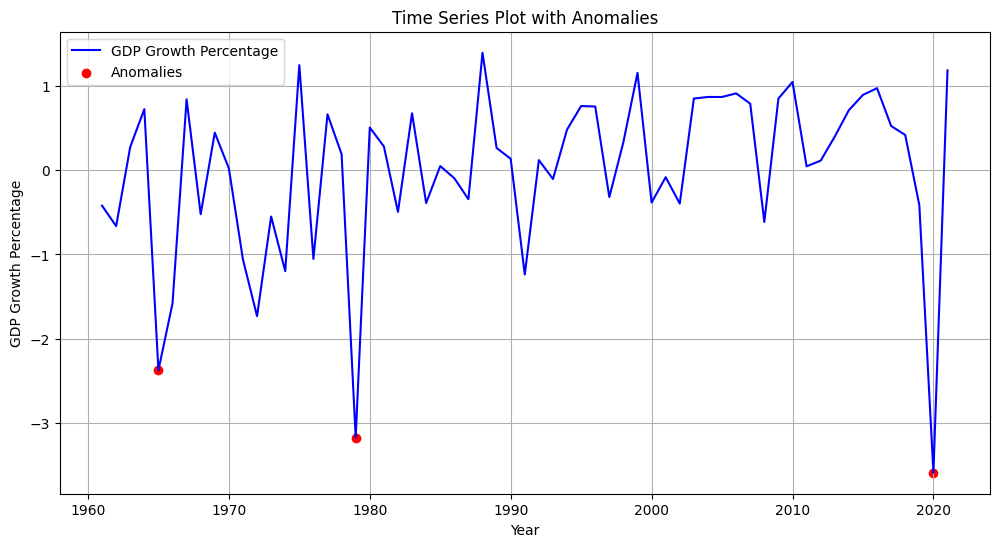

In [9]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Year' and 'Percentage_Growth' columns, and 'anomaly' column for anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Percentage_Growth '], label='GDP Growth Percentage', color='b')
plt.scatter(anomalies['Year'], anomalies['Percentage_Growth '], color='r', marker='o', label='Anomalies')
plt.xlabel('Year')
plt.ylabel('GDP Growth Percentage')
plt.title('Time Series Plot with Anomalies')
plt.legend()
plt.grid(True)
plt.show()
